# New World™ gathering luck

That post should help you understand what are the requirements to gather a rare ressource in New World.

<binder></binder>

## tl;dr
1. New World RNG is based (mostly) on a d100k roll
2. Bernoulli distribution can be used to compute the probability to get rare ressources
3. [Link to my gathering luck calculator](/assets/tools/nw_gather_calculator.html)

## 1. Introduction

New World™ is a massively multiplayer online role-playing game (MMORPG) developed by Amazon Games Orange County. In this game, you play as a colonizer in the mid-seventeenth century.
Your goal is to survive in this island by crafting, trading, and killings opponents (be it monsters or other players), all of that in an atmosphere surrounded by mystery and magic (powered by the "azoth" ressource).

To be able to perform well in this universe, you need to constantly improve yourself by upgrading your armor, buying consummmables or leveling-up...
This is why trading and crafting is so critical in MMOs, and more specifically collecting ressources (ores, herbs etc...) and their rare version.
One crucial component is the random number generator (RNG) running on the server, this is what determine your loot.

## 2. RNG in New World

### 2.1 How is the luck calculated ?

I will not elaborate too much on this since Mala Zedik already made a [great post on this](https://www.newworldpacifist.com/resources/rng-explained) (btw good luck for his "pacifist" run!).
Basically to summarize it, each time you gather/kill something, you will roll a "virtual" dice. The number of faces depends on the thing your are trying to loot on (monster, chest...),
and 82% of them are based on a 100 000 dice roll (ROL). If you reach a certain threshold, then you are elligible to gain that rare loot, if not then too bad!

Given the probability of obtaining one (rare) ressource,
one can easilly infer how much minimum of tries he needs to perform (i.e. how many monster needs to be killed/ ressources needs to be gathered) using the Bernoulli distribution.

### 2.2 Bernoulli distribution

We define the probability $p$ as the probability to get the rare ressource, and $q= 1-p$, the probability to miss the rare ressource.
Let $X$ be a random variable, following $n$ Bernoulli trials and given that dice rolls are independents, the probability for exactly $k$ successes (i.e. successfull rare loots) is <cite>dodge2008concise</cite>:

\begin{equation}
P(X = k) = \binom{n}{k} \cdot p^kq^{n - k}
\end{equation}

In our context, we don't need exactly $k$ drops, we are interrested in getting at least $k$ ressources ( if we have more then this is better).
To model this we need to define the cummulative distribution $P(X \ge k)$, that can be formulated as a complement probability:

\begin{equation}
P(X \ge k) = 1 - P(X < k)
\end{equation}

This is actually much more convenient to use, for example to compute the probability to get at least $k=1$ rare ressource you can simply define:

\begin{equation}
P(X \ge 1) = 1 - P(X < 1) = 1 - P(X = 0) = 1 - q^n
\end{equation}

Instead of:

\begin{equation}
P(X \ge 1) = P(X = 1) + P(X = 2) + P(X = 3) \dots
\end{equation}

Where you would need to compute the outcome for almost all events (i.e. probability of 1 drop or 2 drops or 3 drops etc...).

As you can see with the Bernoulli formula, it will never be possible to achieve 100% accuracy (if $p < 1$), that is why we can define an "acceptable" error $\alpha$.
For example, we can compute the minimum number of trials to get at least one ressource ($k=1$), with a 95% confidence ($\alpha=0.05$).

## 3. Hands on

The following algorithm should give you an idea about how to concretely compute the bernoulli distribution, for $p=0.05$:

In [1]:
### imports
import math
import scipy
import scipy.special
import matplotlib.pyplot as plt

In [2]:
ress_min = 1 #minimum number of resources to drop
prob_true = 0.05 #probability to drop one ressource
alpha = 0.05 #acceptance error
#reduce computation usage
ress_min = min(ress_min, 1e3)
max_iters = int(1e4)

for n in range(max_iters):
  p_bernoulli = 0.
  for k in range(ress_min):
    p_bernoulli = (scipy.special.comb(n, k) * math.pow(prob_true, k) * math.pow(1 - prob_true, n - k)) + p_bernoulli
  if (p_bernoulli < (alpha - 1e-6)):
    break

print("Minimal tries: ", n)

Minimal tries:  59


One can also check the impact on the probability depending on the minimal number of tries (the inverse cummulative distribution $P(X>=k) = 1 - P(X<k)$).

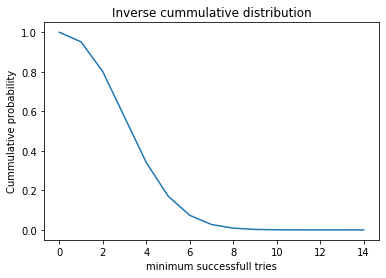

In [3]:
bernoulli_list = []
ress_min_list = range(15)

for ress_min in ress_min_list:
  p_bernoulli = 0.
  for k in range(ress_min):
    p_bernoulli = (scipy.special.comb(n, k) * math.pow(prob_true, k) * math.pow(1 - prob_true, n - k)) + p_bernoulli
  bernoulli_list += [1 - p_bernoulli]

fix, axes = plt.subplots()
axes.plot(ress_min_list, bernoulli_list)
axes.set_xlabel("minimum successfull tries")
axes.set_ylabel("Cummulative probability")
axes.set_title("Inverse cummulative distribution")
plt.show()

Obviusly, the probability decrease when increasing the minimum successful tries (i.e. it is more difficult to drop more ressources)!

## Gathering luck calculator tool

I implemented [a tool](/assets/tools/nw_gather_calculator.html) that you can use to check your probability of dropping something.

>**Warning**  
>At the time of writing, luck bonuses are based on version 1.0.2.
>
>The true loot luck is based from [Mala Zedik post](https://www.newworldpacifist.com/resources/rng-explained) from the closed Beta.

# Tags

Data-Science; Statistics; Video-Games;